# Enrolments Data

## Exploration
### Statistical exploration

#### Reading the data, removing useless columns and adding special columns

In [ ]:
import pandas as pd
import numpy as np
#Read the data
enrolments = pd.read_csv("data/courses snap_sales_funnel 2017-07-05T1254.csv",low_memory=False)

In [ ]:
enrolments.columns

##### Columns
- 'Startdate' = Enrolment course start date
- 'Enddate'= Enrolment course end date
- 'Metro' = Enrolment course location
- 'Course' = Enrolment course (WDi, DAT, etc.)
- 'PhoneValid' = Whether enrolment has valid phone number
- 'Price' = Enrolment course price
- 'Type' = Enrolment course type (immersive, part-time, remote)
- 'DaysEnroltoStart' = Days between enrolment and course start date
- 'DaysInvoicetoEnrol'= Days between invoice and enrolment
- 'DaysLeadtoEnroled' = Days between lead entry (e.g. website visit) to enrolment
- 'EnrolDate' = Date of enrolment
- 'EnrolDay' = Day (of the week) of enrolment
- 'EnrolHour' = Hour of enrolment
- 'Month' = Month of enrolment
- 'EnrolWeek' = Week of enrolment
- 'Year' = Year of enrolment
- 'CanceledDate' = Date cancelled
- 'CanceledMonth' = Month cancelled
- 'ExpectedPayment' = Method of expected payment (e.g. employer paid, personal loan, etc.)
- 'PardotCategory' = Category of lead - how did they enter our system?
- 'ApplicationType' = Type of application
- 'LeadID' = ID of lead
- 'Status'= Status of lead
- 'OppCreatedDate' = Date lead creation
- 'OppOwnerMetro' = Metro of lead creation
- 'SpeedtoLead' = Time taken to contact lead
- 'CampaignSource' = Source of campaign
- 'CampaignSourceCategory' = Category of source of campaign

In [ ]:
enrolments.info()

##### Remove some useless columns or unused columns (with majority null value)

In [ ]:
enrolments.drop('Status', axis=1, inplace=True)
enrolments.drop('CampaignSourceCategory',axis=1,inplace=True)
enrolments.drop('CampaignSource',axis=1,inplace=True)
enrolments.drop('OppOwnerMetro', axis=1, inplace=True)
enrolments.drop('OppCreatedDate', axis=1, inplace=True)
enrolments.drop('LeadID', axis=1, inplace=True)
enrolments.drop('SpeedtoLead', axis=1, inplace=True)
enrolments.columns

In [ ]:
#Add cancelled column to track whether an enrolment cancelled
enrolments['Cancelled'] = enrolments.CanceledDate.notnull()
enrolments.drop('CanceledDate', axis=1, inplace=True)
enrolments.drop('CanceledMonth', axis=1, inplace=True)

In [ ]:
#Add an APAC column
enrolments['APAC'] = enrolments['Metro'].isin(['sydney','melbourne','hong-kong','singapore','brisbane'])
enrolments.APAC.value_counts()

In [ ]:
#Limit to only post mid-2014 data and pre mid-2017 data
enrolments = enrolments[enrolments.EnrolDate > 20140630]
enrolments = enrolments[enrolments.Startdate < 20170630]

In [ ]:
#Cancellations are enroled before their course starts, so daysenroltostart must be positive
enrolments = enrolments[enrolments.DaysEnroltoStart > 0]

In [ ]:
#enrolments.info()
#enrolments.describe()
enrolments.shape
#enrolments.columns

#### Dealing with null values

In [ ]:
enrolments.isnull().sum()

In [ ]:
#enrolments.Price.fillna(0, inplace=True)

In [ ]:
enrolments['ExpectedPayment'] = enrolments.ExpectedPayment.map({
    'Student / Self': 'Student / Self',
    'Student (self)': 'Student / Self',
    'Employer': 'Employer',
    'Loan (Partner, please note)': 'Loan Partner',
    'Veterans Affairs': 'Veterans Affairs',
    'Employer Bulk Pre-paid': 'Employer',
    'Scholarship (Opportunity Fund)': 'Scholarship',
    'Loan Partner (please note)': 'Loan Partner',
    'Family':'Family',
    'Other (please note)':'Other',
    'GA Employee/Instructor':'GA Employee/Instructor',
    'Loan (Private Bank, please note)':'Loan (Private)',
    'Government Funding / Grant':'Government Funding / Grant',
    'Other':'Other',
    'CourseHorse':'Other',
    'Opportunity Fund':'Scholarship',
    'Enterprise Credit':'Other',
    'Scholarship (GA Partner, please note)':'Scholarship',
    'Scholarship (Other, please note)':'Scholarship',
})
enrolments.ExpectedPayment.fillna("Unknown", inplace=True)
enrolments.ExpectedPayment.value_counts()

In [ ]:
enrolments.PardotCategory.fillna("Unknown", inplace=True)
enrolments.PardotCategory.value_counts()

In [ ]:
#enrolments.SpeedtoLead.value_counts()
#enrolments.SpeedtoLead.fillna(enrolments.SpeedtoLead.mean(), inplace=True)

In [ ]:
enrolments.isnull().sum()

#### Streamlining multiple categories
##### Most common application types

In [ ]:
#Checkout and include only the more common application types
commonapptypes = enrolments.ApplicationType.value_counts().index[enrolments.ApplicationType.value_counts()>147]
enrolments = enrolments[enrolments.ApplicationType.isin(commonapptypes)]
enrolments.shape

In [ ]:
enrolments.ApplicationType.value_counts()

##### Most common Pardot types

In [ ]:
#Checkout only and include the more common Pardot types
commonpdtypes = enrolments.PardotCategory.value_counts().index[enrolments.PardotCategory.value_counts()>100]
enrolments = enrolments[enrolments.PardotCategory.isin(commonpdtypes)]
enrolments.shape

In [ ]:
enrolments.PardotCategory.value_counts()

##### Most common courses

In [ ]:
commoncourses = enrolments.Course.value_counts().index[enrolments.Course.value_counts()>100]
enrolments = enrolments[enrolments.Course.isin(commoncourses)]
enrolments.shape

##### Mapping PhoneValid field to yes and no

In [ ]:
enrolments.PhoneValid.unique()
enrolments['PhoneValid'] = enrolments.PhoneValid.map({'Yes': 1,'No': 0})

In [ ]:
enrolments.info()

### Visualisation
#### Exploring the data visually

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import urllib

%matplotlib inline
sns.set(color_codes=True)

In [ ]:
plt.figure(figsize = (15,6))
sns.distplot(enrolments.DaysInvoicetoEnrol, bins=10)

In [ ]:
sns.distplot(enrolments.DaysEnroltoStart, bins=10)

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x='Metro', y = 'Cancelled', data = enrolments)

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x='ExpectedPayment', y = 'Cancelled', data = enrolments)

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Enrolments v Cancelations")
sns.countplot(x='Month', hue='Cancelled', data = enrolments)

In [ ]:
sns.jointplot(x='DaysEnroltoStart', y="Price", data=enrolments)

In [ ]:
sns.jointplot(x='DaysEnroltoStart', y="DaysInvoicetoEnrol", data=enrolments)

In [ ]:
corr = enrolments.corr()
corr = (corr)
plt.figure(figsize = (20,20))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

## Running dummy data
- These columns have text outputs:
 - Metro: object
 - Course: object
 - Type: object
 - EnrolDay: object
 - ExpectedPayment: object
 - ApplicationType: object
 - PardotCategory: object

In [ ]:
enrolments.info()

In [ ]:
dummydata = pd.get_dummies(data=enrolments, columns = ['Metro','Course','Type','ExpectedPayment','ApplicationType','PardotCategory','EnrolDay'], prefix = ['Metro','Course','Type','ExpectedPayment','ApplicationType','PardotCategory','EnrolDay'] )

In [ ]:
dummydata.shape

In [ ]:
dummydata.columns

# Next step:
## Let's try some modeling!

#### What's our baseline?

It's important to have some baseline to compare it to, so let's look at what the chance of picking a student at random and picking a cancellation:

In [ ]:
cancels = dummydata.Cancelled.value_counts()

In [ ]:
#Percentage of enrolments that cancel:
Percent = (1-cancels[0]/(cancels[0]+cancels[1]))
(1-3383/(3383+28162))*100

In [ ]:
all_ftcolumns = dummydata.columns.tolist()
all_ftcolumns.remove('Cancelled')
all_ftcolumns


X = dummydata[all_ftcolumns]
y = dummydata.Cancelled

In [ ]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_dumb_class = dumb.predict(X_test)
print (metrics.accuracy_score(y_test, y_dumb_class))

- Because we're looking at predicting cancellation (predicting "1" for the "Cancelled" attribute), a confusion matrix, sensitivity and specificity are good mechanisms for testing the accuracy of a model!
- Sensitivity is the number of true positives as a percentage of all predicted positives.
- Specificity is the number of true negatives as a percentage of all predicted negatives.

- We want HIGH SPECIFICITY!

https://www.analyticsvidhya.com/blog/2016/02/7-important-model-evaluation-error-metrics/

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_dumb_class)
print(confusion_matrix)
print('Sensitivity:',(confusion_matrix[0,0]/(confusion_matrix[0,1]+ confusion_matrix[0,0])))
print('Specificity:',(confusion_matrix[1,1]/(confusion_matrix[1,1]+ confusion_matrix[1,0])))

In [ ]:
#generate the ROC curve
import matplotlib.pyplot as plt
# Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = dumb.predict_proba(X_test)[:,1]
# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# Store the Area Under the Curve (AUC) so we can annotate our graph with this metric
roc_auc = metrics.auc(fpr,tpr)
# Plot the ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
# What's happening here is we are changing the cutoff value from 0 to 1.
# When we have a cutoff of zero this means that we have no positive predictions so both fpr and tpr are both 0
# Our aim when modelling is to maximise the area under the curve, the closer to one the better the model.

### Decision Tree

In [ ]:
treesubset = dummydata

In [ ]:
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline

#cancelled = treesubset['Cancelled']
#del 'Cancelled'

In [ ]:
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=100)
# Fit the decision tree classifier
ctree.fit(X_train, y_train)
# Create a feature vector
features = treesubset.columns.tolist()

In [ ]:
from io import StringIO
out = StringIO()
tree.export_graphviz(ctree, out_file = out)
from sklearn.tree import export_graphviz
export_graphviz(ctree, out_file='decisiontree.dot', feature_names=features)

In [ ]:
y_pred_class = ctree.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_matrix)
print('Sensitivity:',(confusion_matrix[0,0]/(confusion_matrix[0,1]+ confusion_matrix[0,0])))
print('Specificity:',(confusion_matrix[1,1]/(confusion_matrix[1,1]+ confusion_matrix[1,0])))

In [ ]:
import matplotlib.pyplot as plt
preds = ctree.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Previously exported: 
<img src="assets/img/decisiontree-enrolments.png">

### Logistic Regression
##### Plain ol' logistic regression:

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [ ]:
#fit the logreg model and print the coefficients
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
zip(all_ftcolumns, logreg.coef_[0])
print(logreg.fit(X_train, y_train))
y_pred_class = logreg.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred_class))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_matrix)
print('Sensitivity:',(confusion_matrix[0,0]/(confusion_matrix[0,1]+ confusion_matrix[0,0])))
print('Specificity:',(confusion_matrix[1,1]/(confusion_matrix[1,1]+ confusion_matrix[1,0])))

In [ ]:
import matplotlib.pyplot as plt
preds = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

* Logistic regression is as good as picking the most frequent class for all of them.
* Really that's all that this is doing right now.

##### Cross-validation doesn't help us much more:

In [ ]:
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

In [ ]:
print('RMSE (No reg.) =', np.sqrt(metrics.mean_squared_error(y_test,y_pred_class)))

#### Adding regularisation

In [ ]:
from sklearn.linear_model import RidgeCV
alpha_range = 10.**np.arange(-5, 5)
rregcv = RidgeCV(normalize=True, scoring='neg_mean_squared_error', alphas=alpha_range)
rregcv.fit(X_train, y_train)

print('Optimal Alpha Value: ', rregcv.alpha_)

preds = rregcv.predict(X_test)
print ('RMSE (Ridge CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))

In [ ]:
from sklearn.linear_model import LassoCV
alpha_range = 10.**np.arange(-4, 4)
lascv = LassoCV(normalize=True, alphas=alpha_range)
lascv.fit(X_train, y_train)
print('Optimal Alpha Value: ',lascv.alpha_)
lascv.coef_
preds = lascv.predict(X_test)
print('RMSE (Lasso CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))#generate the ROC curve

In [ ]:
from sklearn.linear_model import ElasticNetCV
alpha_range = 10.**np.arange(-3, 3)
enetCV = ElasticNetCV(normalize=True, alphas=alpha_range)
enetCV.fit(X_train, y_train)
print('Optimal Alpha Value: ',enetCV.alpha_)

enetCV.coef_
preds = enetCV.predict(X_test)
print('RMSE (ENET CV reg.)', np.sqrt(metrics.mean_squared_error(y_test, preds)))

### KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(5)
KNN_model.fit(X_train, y_train)
y_pred_class = KNN_model.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_class))

print('KNN RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred_class)))
print(metrics.accuracy_score(y_test,y_pred_class))
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_matrix)
print('Sensitivity:',(confusion_matrix[0,0]/(confusion_matrix[0,1]+ confusion_matrix[0,0])))
print('Specificity:',(confusion_matrix[1,1]/(confusion_matrix[1,1]+ confusion_matrix[1,0])))

In [ ]:
import matplotlib.pyplot as plt
preds = KNN_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Is there a better model?
- Decision tree is the best so far, but it's still not very good!
- Why are we running into so many issues?
- The issue is that the classes are imbalanced. So many models assume an equal number in class A as are in class B, but here there are many more enrolments that become students than become cancellations.

https://svds.com/learning-imbalanced-classes/

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=400, max_features=2, oob_score=True, random_state=1,class_weight='balanced')
rfclf.fit(dummydata[all_ftcolumns], dummydata.Cancelled)
rfclf.oob_score_

In [ ]:
from sklearn import metrics

y_pred_class = rfclf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_matrix)
print('Sensitivity:',(confusion_matrix[0,0]/(confusion_matrix[0,1]+ confusion_matrix[0,0])))
print('Specificity:',(confusion_matrix[1,1]/(confusion_matrix[1,1]+ confusion_matrix[1,0])))

In [ ]:
import matplotlib.pyplot as plt
preds = rfclf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='purple', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
feature_importance = pd.DataFrame({'feature':all_ftcolumns, 'importance':rfclf.feature_importances_})
feature_importance.sort('importance',ascending=False)

# PLAYING AROUND

In [5]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

enrolments = pd.read_csv("data/courses snap_sales_funnel 2017-07-05T1254.csv",low_memory=False)

enrolments.drop('Status', axis=1, inplace=True)
enrolments.drop('CampaignSourceCategory',axis=1,inplace=True)
enrolments.drop('CampaignSource',axis=1,inplace=True)
enrolments.drop('OppOwnerMetro', axis=1, inplace=True)
enrolments.drop('OppCreatedDate', axis=1, inplace=True)
enrolments.drop('LeadID', axis=1, inplace=True)
enrolments.drop('SpeedtoLead', axis=1, inplace=True)
enrolments.drop('Year', axis=1, inplace=True)

enrolments['Cancelled'] = enrolments.CanceledDate.notnull()
enrolments.drop('CanceledDate', axis=1, inplace=True)
enrolments.drop('CanceledMonth', axis=1, inplace=True)

enrolments['APAC'] = enrolments['Metro'].isin(['sydney','melbourne','hong-kong','singapore','brisbane'])
enrolments = enrolments[enrolments.EnrolDate > 20140630]
enrolments = enrolments[enrolments.Startdate < 20170630]
enrolments = enrolments[enrolments.DaysEnroltoStart > 0]

enrolments['ExpectedPayment'] = enrolments.ExpectedPayment.map({
    'Student / Self': 'Student / Self',
    'Student (self)': 'Student / Self',
    'Employer': 'Employer',
    'Loan (Partner, please note)': 'Loan Partner',
    'Veterans Affairs': 'Veterans Affairs',
    'Employer Bulk Pre-paid': 'Employer',
    'Scholarship (Opportunity Fund)': 'Scholarship',
    'Loan Partner (please note)': 'Loan Partner',
    'Family':'Family',
    'Other (please note)':'Other',
    'GA Employee/Instructor':'GA Employee/Instructor',
    'Loan (Private Bank, please note)':'Loan (Private)',
    'Government Funding / Grant':'Government Funding / Grant',
    'Other':'Other',
    'CourseHorse':'Other',
    'Opportunity Fund':'Scholarship',
    'Enterprise Credit':'Other',
    'Scholarship (GA Partner, please note)':'Scholarship',
    'Scholarship (Other, please note)':'Scholarship',
})
enrolments.ExpectedPayment.fillna("Unknown", inplace=True)
enrolments.PardotCategory.fillna("Unknown", inplace=True)
enrolments = enrolments[enrolments.ApplicationType.isin(enrolments.ApplicationType.value_counts().index[enrolments.ApplicationType.value_counts()>147])]
enrolments = enrolments[enrolments.PardotCategory.isin(enrolments.PardotCategory.value_counts().index[enrolments.PardotCategory.value_counts()>100])]
enrolments = enrolments[enrolments.Course.isin(enrolments.Course.value_counts().index[enrolments.Course.value_counts()>100])]
enrolments['PhoneValid'] = enrolments.PhoneValid.map({'Yes': 1,'No': 0})

dummydata = pd.get_dummies(data=enrolments, columns = ['Metro','Course','Type','ExpectedPayment','ApplicationType','PardotCategory','EnrolDay'], prefix = ['Metro','Course','Type','ExpectedPayment','ApplicationType','PardotCategory','EnrolDay'] )

all_ftcolumns = dummydata.columns.tolist()
all_ftcolumns.remove('Cancelled')

all_ftcolumns.remove('EnrolDate')
all_ftcolumns.remove('DaysLeadtoEnroled')
all_ftcolumns.remove('DaysEnroltoStart')
all_ftcolumns.remove('DaysInvoicetoEnrol')
all_ftcolumns.remove('EnrolWeek')
all_ftcolumns.remove('EnrolHour')
all_ftcolumns.remove('Startdate')
all_ftcolumns.remove('Enddate')
all_ftcolumns.remove('Month')
all_ftcolumns.remove('Price')
all_ftcolumns.remove('APAC')

In [6]:
X = dummydata[all_ftcolumns]
y = dummydata.Cancelled

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

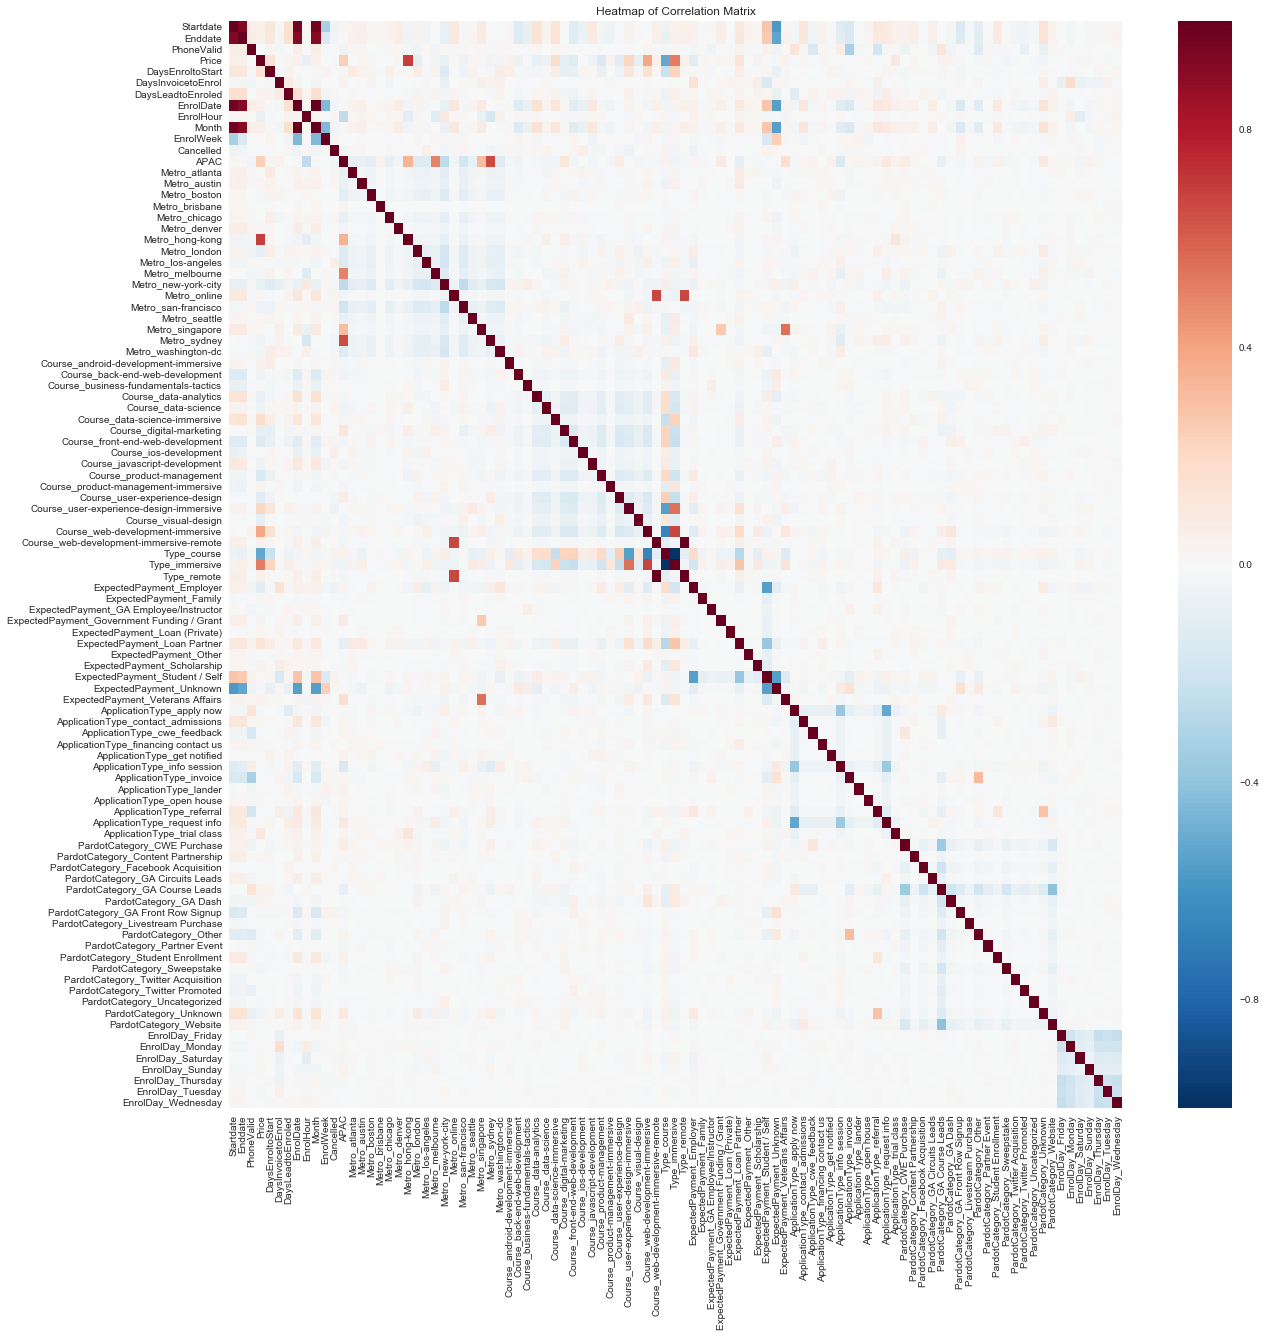

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(color_codes=True)

corr = dummydata.corr()
corr = (corr)
plt.figure(figsize = (20,20))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=400, max_features=2, oob_score=True, random_state=1,class_weight='balanced')
rfclf.fit(dummydata[all_ftcolumns], dummydata.Cancelled)
rfclf.oob_score_

0.81581867173878586

In [17]:
from sklearn import metrics

y_pred_class = rfclf.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_matrix)
print('Sensitivity:',(confusion_matrix[0,0]/(confusion_matrix[0,1]+ confusion_matrix[0,0])))
print('Specificity:',(confusion_matrix[1,1]/(confusion_matrix[1,1]+ confusion_matrix[1,0])))

[[6392  646]
 [  82  767]]
Sensitivity: 0.908212560386
Specificity: 0.903415783274


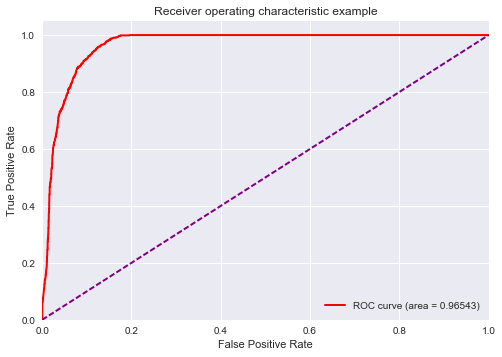

In [18]:
import matplotlib.pyplot as plt
preds = rfclf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC curve (area = %0.5f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='purple', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [19]:
feature_importance = pd.DataFrame({'feature':all_ftcolumns, 'importance':rfclf.feature_importances_})
feature_importance.sort('importance',ascending=False)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,feature,importance
65,PardotCategory_GA Course Leads,0.038951
0,PhoneValid,0.034942
49,ApplicationType_apply now,0.033079
59,ApplicationType_request info,0.032078
78,EnrolDay_Friday,0.030465
84,EnrolDay_Wednesday,0.029869
11,Metro_new-york-city,0.029800
83,EnrolDay_Tuesday,0.028551
79,EnrolDay_Monday,0.028156
54,ApplicationType_info session,0.027910
